# **NAME : Affan Zulfiqar**

# **REG NO : B22F0144AI050**

# **LAB REPORT 09**

# **Support Vector Machine (SVM) Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load the Heart Disease dataset
# Assuming 'heart.csv' is the dataset file; replace with your path if different
data = pd.read_csv("/content/heart.csv")

# Show the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check dataset info and look for missing values
data.info()
data.describe()

# Select two features and the target variable
# Example: choosing 'trestbps' (resting blood pressure) and 'chol' (cholesterol) as features and 'target' as the label
X = data[['trestbps', 'chol']].values
y = data['target'].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Preprocess the Data (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = svm_model.predict(X_test)

# Adjust classification report with zero_division parameter
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix (no additional parameters needed)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91

Confusion Matrix:
 [[ 0 41]
 [ 0 50]]


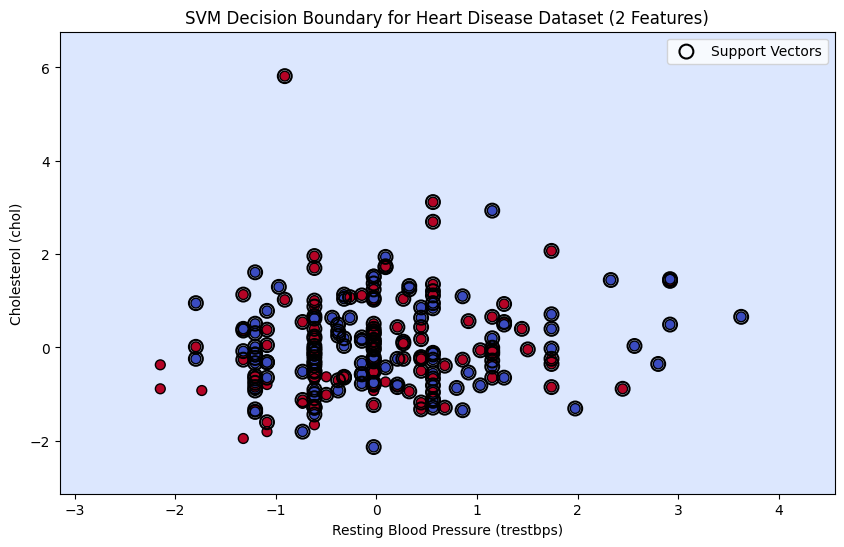

In [ ]:
#Visualize the Decision Boundary: Creating a mesh to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict across the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and scatter plot of data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50, edgecolors='k')

# Highlight support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            facecolors='none', edgecolors='k', s=100, linewidths=1.5, label='Support Vectors')

plt.title("SVM Decision Boundary for Heart Disease Dataset (2 Features)")
plt.xlabel("Resting Blood Pressure (trestbps)")
plt.ylabel("Cholesterol (chol)")
plt.legend()
plt.show()

# **Home Tasks:**

# **Task 1:**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Features and target
X = df.drop("MedHouseVal", axis=1)  # Features
y = df["MedHouseVal"]  # Target (median house value)

# Display basic info
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

In [ ]:
# Check for missing values
if df.isnull().sum().any():
    df.fillna(df.mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train SVR model with a linear kernel
svr_linear = SVR(kernel="linear")
svr_linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = svr_linear.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Kernel SVR - Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"Linear Kernel SVR - R-squared (R²): {r2_linear:.4f}")

Linear Kernel SVR - Mean Squared Error (MSE): 0.5544
Linear Kernel SVR - R-squared (R²): 0.5776


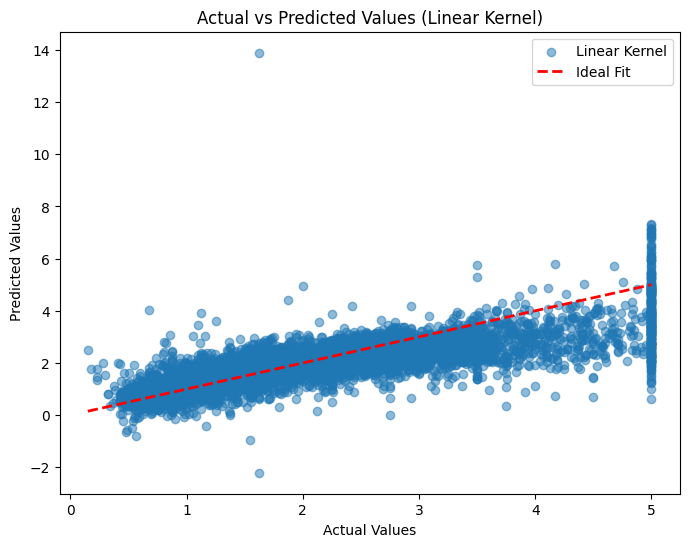

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label="Linear Kernel")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Kernel)")
plt.legend()
plt.show()


RBF Kernel SVR - Mean Squared Error (MSE): 0.3496
RBF Kernel SVR - R-squared (R²): 0.7337


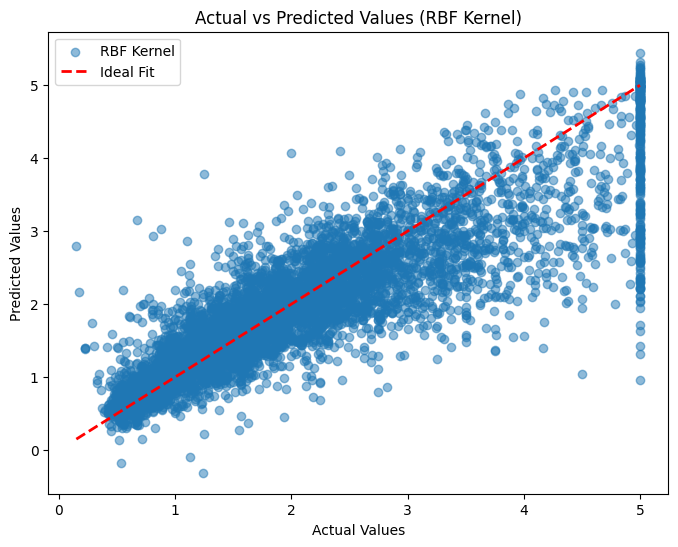

In [ ]:
# Train SVR model with RBF kernel
svr_rbf = SVR(kernel="rbf")
svr_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_rbf = svr_rbf.predict(X_test)

# Evaluate RBF kernel
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

print(f"RBF Kernel SVR - Mean Squared Error (MSE): {mse_rbf:.4f}")
print(f"RBF Kernel SVR - R-squared (R²): {r2_rbf:.4f}")

# Plot comparison
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rbf, alpha=0.5, label="RBF Kernel")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (RBF Kernel)")
plt.legend()
plt.show()


# **Task 2:**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/GOOG.csv'  # Path to your uploaded file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())



         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Select features and target
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train SVR model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_rbf.predict(X_test)


In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.2762
R-squared (R²): 0.9998


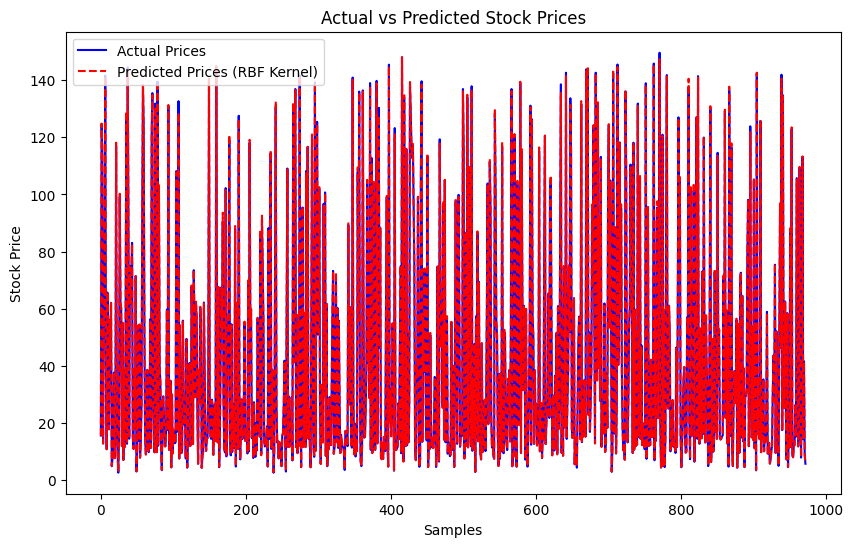

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices (RBF Kernel)", color="red", linestyle="--")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Samples")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [ ]:
%%shell
jupyter nbconvert --to html /content/Affan_Zulfiqar_B22F0144AI050_ML_Lab_09.ipynb

[NbConvertApp] Converting notebook /content/Affan_Zulfiqar_B22F0144AI050_ML_Lab_09.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 1170648 bytes to /content/Affan_Zulfiqar_B22F0144AI050_ML_Lab_09.html
